<a href="https://colab.research.google.com/github/Sanjeeviit/MLT/blob/main/KDNuggets1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import io
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning:

jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.



In [5]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [6]:
chicago_taxi_dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


In [7]:
chicago_taxi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  object 
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  int64  
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [9]:
training_df = chicago_taxi_dataset.copy()

In [10]:
training_df.describe()

,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL
count,31694.000000,31694.000000,31694.000000,31694.000000,1.325900e+04,1.402300e+04,28477.000000,28199.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000
mean,14.185635,1319.796397,8.289463,20.256544,1.703153e+10,1.703140e+10,35.562138,25.550410,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053
std,5.159454,928.932873,7.265672,11.110390,3.827747e+05,3.408106e+05,26.421367,20.349707,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537
min,0.000000,60.000000,0.500000,4.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000
25%,10.500000,548.000000,1.720000,11.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000
50%,14.750000,1081.000000,5.920000,17.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000
75%,18.000000,1888.000000,14.500000,27.500000,1.703198e+10,1.703184e+10,59.000000,32.000000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000
max,23.750000,7140.000000,68.120000,64.800000,1.703198e+10,1.703198e+10,77.000000,77.000000,159.250000,60.000000,648.600000,27.000000,85.000000,248.500000


In [11]:
training_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0
TRIP_START_TIMESTAMP,0
TRIP_END_TIMESTAMP,0
TRIP_START_HOUR,0
TRIP_SECONDS,0
TRIP_MILES,0
TRIP_SPEED,0
PICKUP_CENSUS_TRACT,18435
DROPOFF_CENSUS_TRACT,17671
PICKUP_COMMUNITY_AREA,3217
DROPOFF_COMMUNITY_AREA,3495


In [12]:
max_fare = training_df['FARE'].max()
max_fare

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



159.25

What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No

In [13]:
mean_distance = training_df['TRIP_MILES'].mean()
mean_distance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



8.289462674323214

In [24]:
no_of_cab_companies = training_df['COMPANY'].nunique()
no_of_cab_companies

31

In [18]:
most_frequent_payment_type = training_df['PAYMENT_TYPE'].mode()[0]
most_frequent_payment_type

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'Credit Card'

In [20]:
missing_values = training_df.isnull().sum().sum()
missing_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



42818

In [26]:
training_df.corr(numeric_only = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL
TRIP_START_HOUR,1.000000,0.008696,-0.038388,-0.095969,0.074479,-0.168438,0.011324,-0.128613,-0.037789,0.037504,0.062828,0.006833,0.023362,-0.015010
TRIP_SECONDS,0.008696,1.000000,0.800855,0.301209,0.493533,0.141334,0.437223,0.195731,0.830292,0.433930,-0.084294,0.008326,0.273981,0.759248
TRIP_MILES,-0.038388,0.800855,1.000000,0.748004,0.593248,0.162535,0.591359,0.249433,0.975344,0.575374,-0.049594,0.020540,0.491254,0.947163
TRIP_SPEED,-0.095969,0.301209,0.748004,1.000000,0.559719,0.152314,0.499278,0.222068,0.695734,0.421333,-0.057886,0.021274,0.434519,0.698774
PICKUP_CENSUS_TRACT,0.074479,0.493533,0.593248,0.559719,1.000000,-0.040886,0.886250,-0.078281,0.586485,0.488247,0.013572,0.034315,0.397197,0.602521
DROPOFF_CENSUS_TRACT,-0.168438,0.141334,0.162535,0.152314,-0.040886,1.000000,-0.018737,0.776753,0.159137,0.072690,-0.022817,0.024831,0.039611,0.142989
PICKUP_COMMUNITY_AREA,0.011324,0.437223,0.591359,0.499278,0.886250,-0.018737,1.000000,0.018548,0.567285,0.455393,0.019191,0.022610,0.458703,0.618728
DROPOFF_COMMUNITY_AREA,-0.128613,0.195731,0.249433,0.222068,-0.078281,0.776753,0.018548,1.000000,0.252030,0.031585,-0.089435,0.011812,-0.013395,0.206128
FARE,-0.037789,0.830292,0.975344,0.695734,0.586485,0.159137,0.567285,0.252030,1.000000,0.544654,-0.070979,0.019363,0.462853,0.952132
TIPS,0.037504,0.433930,0.575374,0.421333,0.488247,0.072690,0.455393,0.031585,0.544654,1.000000,0.550059,0.009655,0.441185,0.700184


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: >

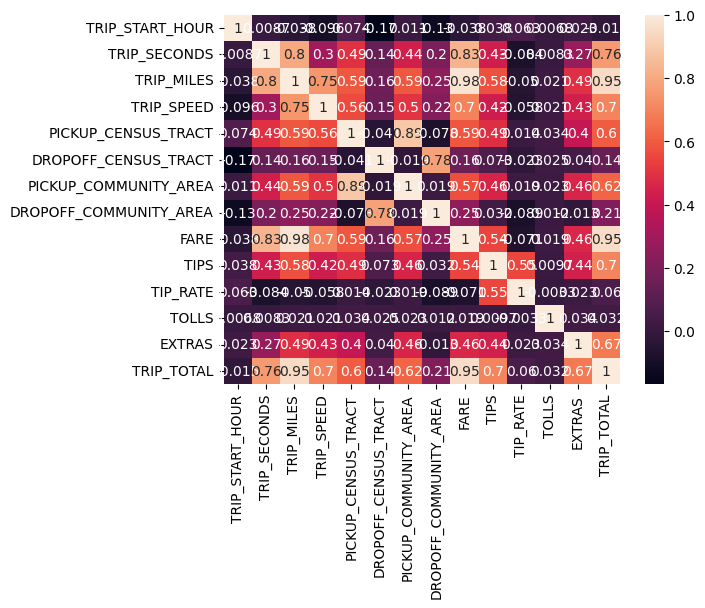

In [27]:
sns.heatmap(training_df.corr(numeric_only = True), annot = True)

Top 5 correlations:
TRIP_MILES  FARE          0.975344
FARE        TRIP_MILES    0.975344
            TRIP_TOTAL    0.952132
TRIP_TOTAL  FARE          0.952132
TRIP_MILES  TRIP_TOTAL    0.947163
dtype: float64


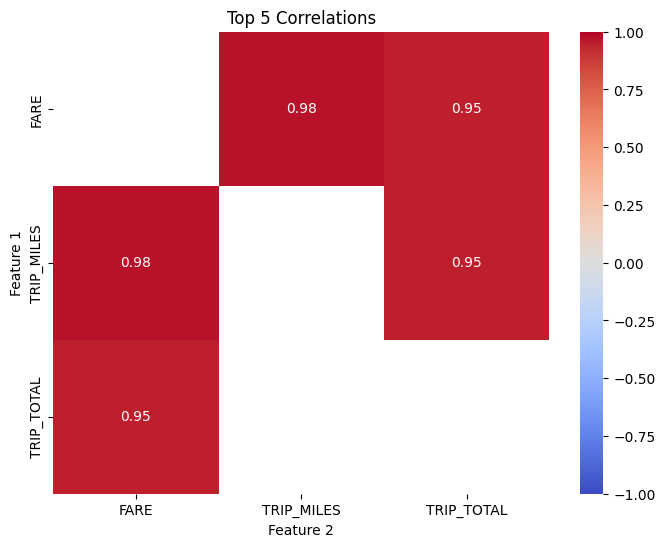

In [28]:
# prompt: choose top 5 coorelation sns.heatmap(training_df.corr(numeric_only = True), annot = True)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'training_df' is already defined as in your provided code

# Calculate the correlation matrix
correlation_matrix = training_df.corr(numeric_only=True)

# Get the absolute values of the correlations
absolute_correlations = correlation_matrix.abs()

# Exclude self-correlations (diagonal)
absolute_correlations = absolute_correlations.mask(np.equal(*np.indices(absolute_correlations.shape)))

# Find the top 5 correlations
top_5_correlations = absolute_correlations.unstack().sort_values(ascending=False).head(5)

print("Top 5 correlations:")
print(top_5_correlations)

# Optionally, visualize the top 5 correlations using a heatmap
top_5_corr_df = pd.DataFrame(top_5_correlations).reset_index()
top_5_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

plt.figure(figsize=(8, 6))
sns.heatmap(pd.pivot_table(top_5_corr_df, values='Correlation', index='Feature 1', columns='Feature 2'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Top 5 Correlations')
plt.show()

In [1]:
import pandas as pd
import numpy as np

# Sample e-commerce transaction data
data = {
    "TransactionID": [101, 102, 103, 104, 105],
    "CustomerName": ["Jane Rust", "june young", "June Doe", None, "JANE RUST"],
    "Product": ["Laptop", "Phone", "Laptop", "Tablet", "Phone"],
    "Price": [1200, 800, 1200, -300, 850],  # Negative value indicates an issue
    "Quantity": [1, 2, None, 1,1],  # Missing value
    "TransactionDate": ["2024-12-01", "2024/12/01", "01-12-2024", None, "2024-12-01"],
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   TransactionID CustomerName Product  Price  Quantity TransactionDate
0            101    Jane Rust  Laptop   1200       1.0      2024-12-01
1            102   june young   Phone    800       2.0      2024/12/01
2            103     June Doe  Laptop   1200       NaN      01-12-2024
3            104         None  Tablet   -300       1.0            None
4            105    JANE RUST   Phone    850       1.0      2024-12-01


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    5 non-null      int64  
 1   CustomerName     4 non-null      object 
 2   Product          5 non-null      object 
 3   Price            5 non-null      int64  
 4   Quantity         4 non-null      float64
 5   TransactionDate  4 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 368.0+ bytes


In [4]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)





Missing Values:
 TransactionID      0
CustomerName       1
Product            0
Price              0
Quantity           1
TransactionDate    1
dtype: int64


In [5]:
print("Data Types:\n", df.dtypes)

Data Types:
 TransactionID        int64
CustomerName        object
Product             object
Price                int64
Quantity           float64
TransactionDate     object
dtype: object


In [6]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors="coerce")
print(df["TransactionDate"])

0   2024-12-01
1          NaT
2          NaT
3          NaT
4   2024-12-01
Name: TransactionDate, dtype: datetime64[ns]


In [7]:
outliers = df[df["Price"] < 0]
print("Outliers:\n", outliers)

Outliers:
    TransactionID CustomerName Product  Price  Quantity TransactionDate
3            104         None  Tablet   -300       1.0             NaT


In [8]:
duplicates = df.duplicated(subset=["CustomerName", "Product"], keep=False)
print("Duplicate Records:\n", df[duplicates])

Duplicate Records:
 Empty DataFrame
Columns: [TransactionID, CustomerName, Product, Price, Quantity, TransactionDate]
Index: []


In [9]:
df["CustomerName"] = df["CustomerName"].str.strip().str.title()
print(df["CustomerName"])

0     Jane Rust
1    June Young
2      June Doe
3          None
4     Jane Rust
Name: CustomerName, dtype: object


In [10]:
invalid_prices = df[~df["Price"].between(0, 5000)]
print("Invalid Prices:\n", invalid_prices)

Invalid Prices:
    TransactionID CustomerName Product  Price  Quantity TransactionDate
3            104         None  Tablet   -300       1.0             NaT


In [11]:
unique_products = df["Product"].value_counts()
print("Unique Products:\n", unique_products)

Unique Products:
 Product
Laptop    2
Phone     2
Tablet    1
Name: count, dtype: int64


In [12]:
inconsistent_names = df["CustomerName"].str.contains(r"[A-Z]{2,}", na=False)
print("Inconsistent Formatting in Names:\n", df[inconsistent_names])

Inconsistent Formatting in Names:
 Empty DataFrame
Columns: [TransactionID, CustomerName, Product, Price, Quantity, TransactionDate]
Index: []


In [13]:
issues = df.isnull().sum(axis=1) + (df["Price"] < 0) + (~df["TransactionDate"].notnull())
problematic_rows = df[issues > 1]
print("Rows with Multiple Issues:\n", problematic_rows)

Rows with Multiple Issues:
    TransactionID CustomerName Product  Price  Quantity TransactionDate
1            102   June Young   Phone    800       2.0             NaT
2            103     June Doe  Laptop   1200       NaN             NaT
3            104         None  Tablet   -300       1.0             NaT


In [14]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch the California housing dataset
data = fetch_california_housing()

# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['MedHouseVal'] = data.target

In [15]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
#check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [19]:
#identify duplicate records
duplicates = df.duplicated()
print("Duplicate Records:\n", df[duplicates])


Duplicate Records:
 Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []


In [20]:
#check Data Types
print("Data Types:\n", df.dtypes)

Data Types:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [22]:
columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
def find_outliers_pandas(df, columns):
        q1 = df[columns].quantile(0.25)
        q3 = df[columns].quantile(0.75)
        IQR=q3-q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outliers = ((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)
        return outliers

outliers = find_outliers_pandas(df, columns_to_check)
print("Outliers:\n", df[outliers])

Outliers:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
41     1.2852      51.0  3.759036   1.248996       517.0  2.076305     37.83   
57     0.8172      52.0  6.102459   1.372951       728.0  2.983607     37.82   
59     2.5625       2.0  2.771930   0.754386        94.0  1.649123     37.82   
...       ...       ...       ...        ...         ...       ...       ...   
20608  1.7167      24.0  5.400000   1.273171       768.0  3.746341     39.10   
20620  4.5625      40.0  4.125000   0.854167       151.0  3.145833     39.05   
20621  2.3661      37.0  7.923567   1.573248       484.0  3.082803     39.01   
20629  2.0943      28.0  5.519802   1.020902      6912.0  3.801980     39.12   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   

       Longitude  MedHouseVa

In [24]:
#numeric features is to validate the range
valid_range = (0,16)
value_range_check = df[~df['MedInc'].between(*valid_range)]
print("Value range check(medinc):\n", value_range_check)

Value range check(medinc):
 Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []


In [25]:
#Check Cross-Column Dependency
# AveRooms should not be smaller than AveBedrooms
invalid_data = df[df['AveRooms'] < df['AveBedrms']]
print("Invalid Records (AveRooms < AveBedrms):")
print(invalid_data)

Invalid Records (AveRooms < AveBedrms):
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []


In [1]:
!pip install great_expectations==0.15.49
from great_expectations.data_context import EphemeralDataContext

# Define the in-memory Data Context configuration
config = {
    "config_version": 3,  # Specify the config version
    "datasources": {
        "pandas_datasource": {
            "execution_engine": {"class_name": "PandasExecutionEngine"},
            "data_connectors": {
                "default_runtime_data_connector": {
                    "class_name": "RuntimeDataConnector",
                    "batch_identifiers": ["default_identifier"]
                }
            },
        }
    },
    "expectations_store_name": "expectations_store",
    "validations_store_name": "validations_store",
    "evaluation_parameter_store_name": "evaluation_parameter_store",
    "stores": {
        "expectations_store": {"class_name": "ExpectationsStore", "module_name": "great_expectations.data_context.store"},
        "validations_store": {"class_name": "ValidationsStore", "module_name": "great_expectations.data_context.store"}, # Explicitly specify the module
        "evaluation_parameter_store": {"class_name": "EvaluationParameterStore", "module_name": "great_expectations.data_context.store"}, # Explicitly specify the module
    },
    "validation_operators": {
        "action_list_operator": {
            "class_name": "ActionListValidationOperator",
            "action_list": [
                {"name": "store_validation_result", "action": {"class_name": "StoreValidationResultAction"}},
                {"name": "store_evaluation_params", "action": {"class_name": "StoreEvaluationParametersAction"}},
            ],
        }
    },
    "data_docs_sites": {},
}

# Initialize the EphemeralDataContext
context = EphemeralDataContext(config)

# ... (rest of your code)

    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)



In [2]:
#Check for Inconsistent Data Entry
import pandas as pd
import re

data = {'Date': ['2023-10-29', '2023-11-15', '23-10-2023', '2023/10/29', '2023-10-30']}
df = pd.DataFrame(data)

# Define the expected date format
date_format_pattern = r'^\d{4}-\d{2}-\d{2}$'  # YYYY-MM-DD format

# Function to check if a date value matches the expected format
def check_date_format(date_str, date_format_pattern):
	return re.match(date_format_pattern, date_str) is not None

# Apply the format check to the 'Date' column
date_format_check = df['Date'].apply(lambda x: check_date_format(x, date_format_pattern))

# Identify and retrieve entries that do not follow the expected format
non_adherent_dates = df[~date_format_check]

if not non_adherent_dates.empty:
	print("Entries that do not follow the expected format:")
	print(non_adherent_dates)
else:
	print("All dates are in the expected format.")

Entries that do not follow the expected format:
         Date
2  23-10-2023
3  2023/10/29


In [1]:
pip install great-expectations --upgrade


In [3]:
import great_expectations as gx
import pandas as pd

# Load the data
df = pd.read_csv('/content/Building_Permits.csv')
df.shape
# Initialize a Data Context (in-memory for quick validation)
context = gx.data_context.EphemeralDataContext(
    {
        "config_version": 3,
        "datasources": {
            "pandas_datasource": {
                "execution_engine": {"class_name": "PandasExecutionEngine"},
                "data_connectors": {
                    "default_runtime_data_connector": {
                        "class_name": "RuntimeDataConnector",
                        "batch_identifiers": ["default_identifier"],
                    }
                },
            }
        },
        "stores": {
            "expectations_store": {"class_name": "ExpectationsStore"},
            "validations_store": {"class_name": "ValidationsStore"},
            "evaluation_parameter_store": {"class_name": "EvaluationParameterStore"},
        },
        "expectations_store_name": "expectations_store",
        "validations_store_name": "validations_store",
        "evaluation_parameter_store_name": "evaluation_parameter_store",
    }
)

# Create a batch request
batch_request = {
    "datasource_name": "pandas_datasource",
    "data_connector_name": "default_runtime_data_connector",
    "data_asset_name": "building_permits_data",
    "runtime_parameters": {"batch_data": df},
    "batch_identifiers": {"default_identifier": "default_batch"},
}

# Get a Validator and define expectations
validator = context.get_validator(batch_request=batch_request)
validator.expect_column_to_exist("Permit Number")
validator.expect_column_values_to_be_unique("Permit Number")
validator.expect_column_values_to_not_be_null("Permit Number")

# Validate the data and print results
validation_result = validator.validate()
print(validation_result)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-3-38e571bbd0c7>:5: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Building_Permits.csv')
CRITICAL:great_expectations.data_context.store.store:Error The module: `great_expectations.data_context.store` does not contain the class: `ValidationsStore`.
        - Please verify that the class named `ValidationsStore` exists. occurred while attempting to instantiate a store.


ClassInstantiationError: The module "great_expectations.data_context.store" exists; however, the system is unable to create an instance of the class "ValidationsStore", searched for inside this module.  Please make sure that the class named "ValidationsStore" is properly defined inside its intended module and declared correctly by the calling entity.  This error is unrecoverable.
            